<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/samplingDesign/multiSpectralImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Features in Multispectral Images
###David Brady
### University of Arizona


Section 8.3 of **Computational Imaging**

This notebook looks at spatio-spectral features in multispectral and hyper-spectral images

### Python modules

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import files
from scipy import signal, io
from scipy import integrate
from scipy.linalg import toeplitz
import cv2
from sklearn.decomposition import PCA
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
#from google.colab import files



## AVIRIS Hyperspectral data set


As an example, we use the Indian Pines data set described by

Baumgardner, M. F., Biehl, L. L., Landgrebe, D. A. (2015). 220 Band AVIRIS Hyperspectral Image Data Set: June 12, 1992 Indian Pine Test Site 3. Purdue University Research Repository. [doi:10.4231/R7RX991C](https://purr.purdue.edu/publications/1947/1)

The data is 2900 meters by 2900 meters with an approximate ground sample distance of 20 meters. There are 220 spectral bands spanning 400 to 2400 nm, the image captures various crops and forests.



In [11]:
#!wget http://www.ehu.eus/ccwintco/uploads/2/22/Indian_pines.mat
pip=io.loadmat('Downloads/Indian_pines.mat')
data=pip['indian_pines']

In [7]:
data.shape

(145, 145, 220)

# Spatial View of the data set

Text(0.5, 1.0, '2000 nm')

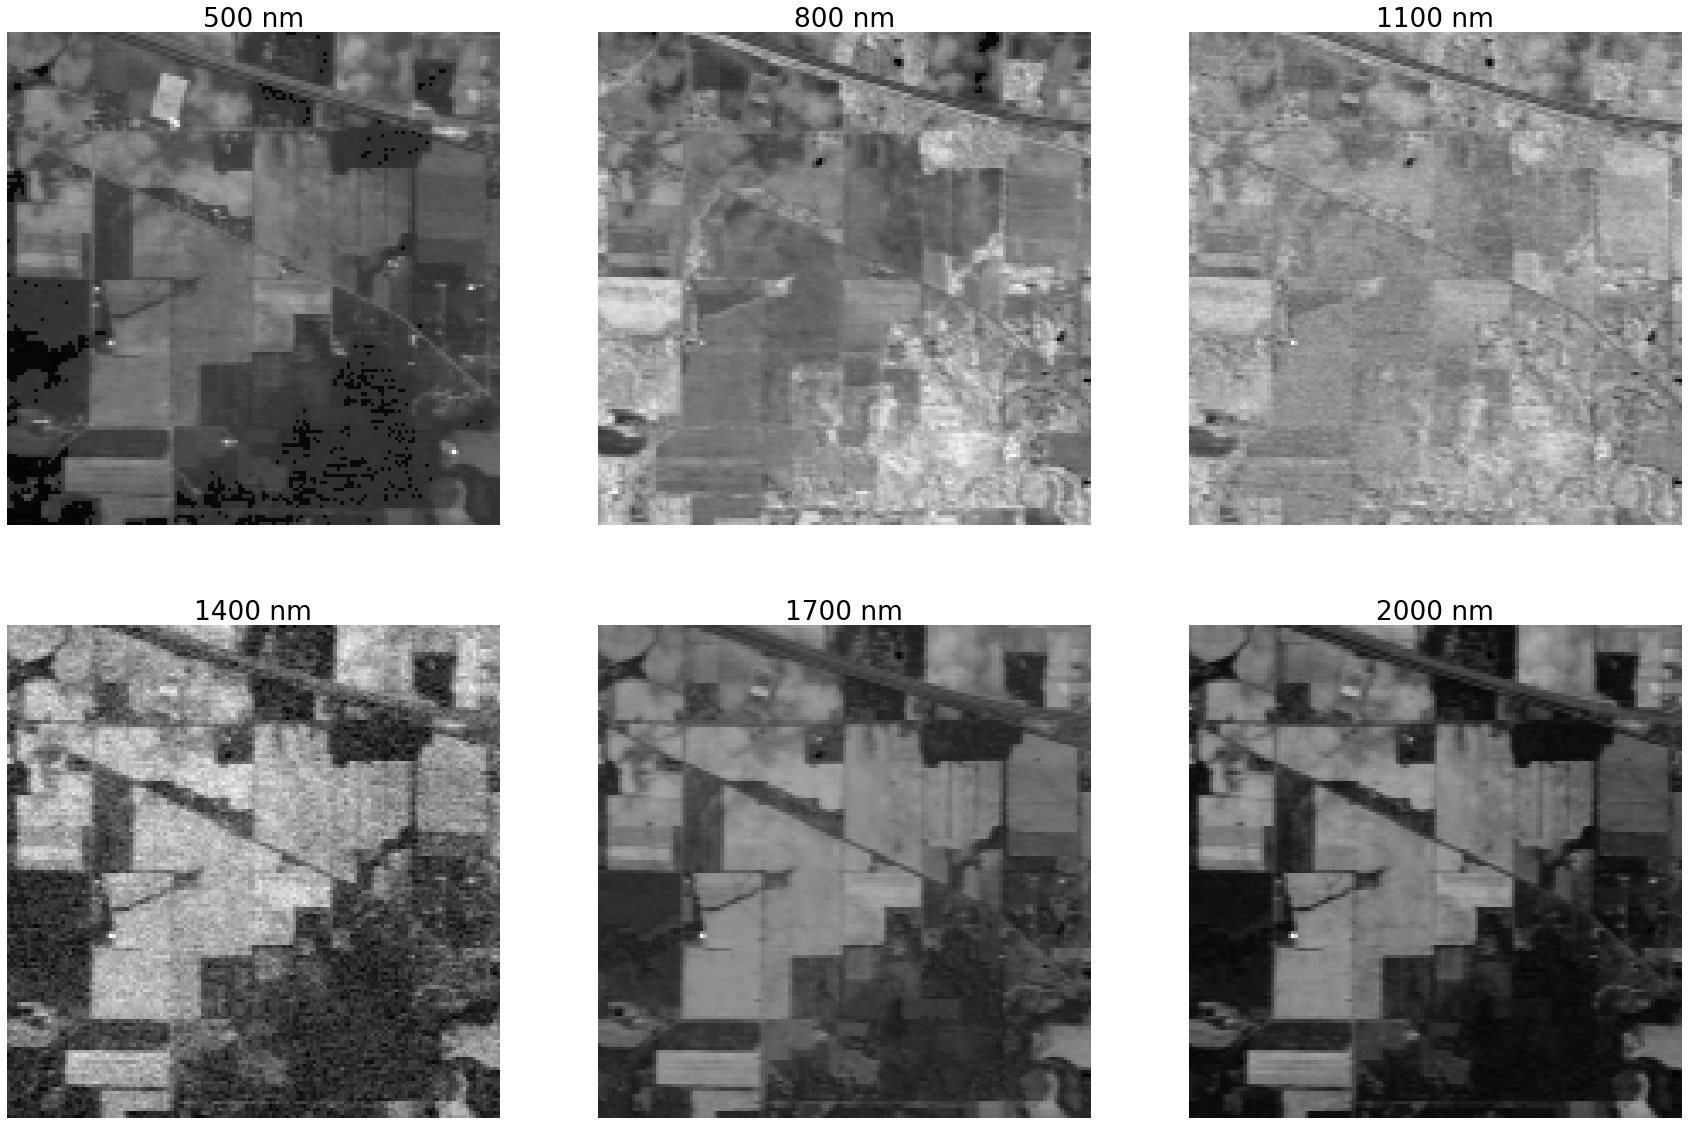

In [ ]:


plt.rcParams['figure.figsize'] = [30, 20]
plt.subplot(2,3,1)
plt.imshow(data[:,:,11], extent=[0,2900,0,2900], cmap='gray')
plt.axis('off')
plt.title('500 nm')
plt.subplot(2,3,2)
plt.imshow(data[:,:,44], extent=[0,2900,0,2900], cmap='gray')
plt.axis('off')
plt.title('800 nm')
plt.subplot(2,3,3)
plt.imshow(data[:,:,77], extent=[0,2900,0,2900], cmap='gray')
plt.axis('off')
plt.title('1100 nm')
plt.subplot(2,3,4)
plt.imshow(data[:,:,110], extent=[0,2900,0,2900], cmap='gray')
plt.axis('off')
plt.title('1400 nm')
plt.subplot(2,3,5)
plt.imshow(data[:,:,143], extent=[0,2900,0,2900], cmap='gray')
plt.axis('off')
plt.title('1700 nm')
plt.subplot(2,3,6)
plt.imshow(data[:,:,176], extent=[0,2900,0,2900], cmap='gray')
plt.axis('off')
plt.title('2000 nm')


## Spectral view of data set

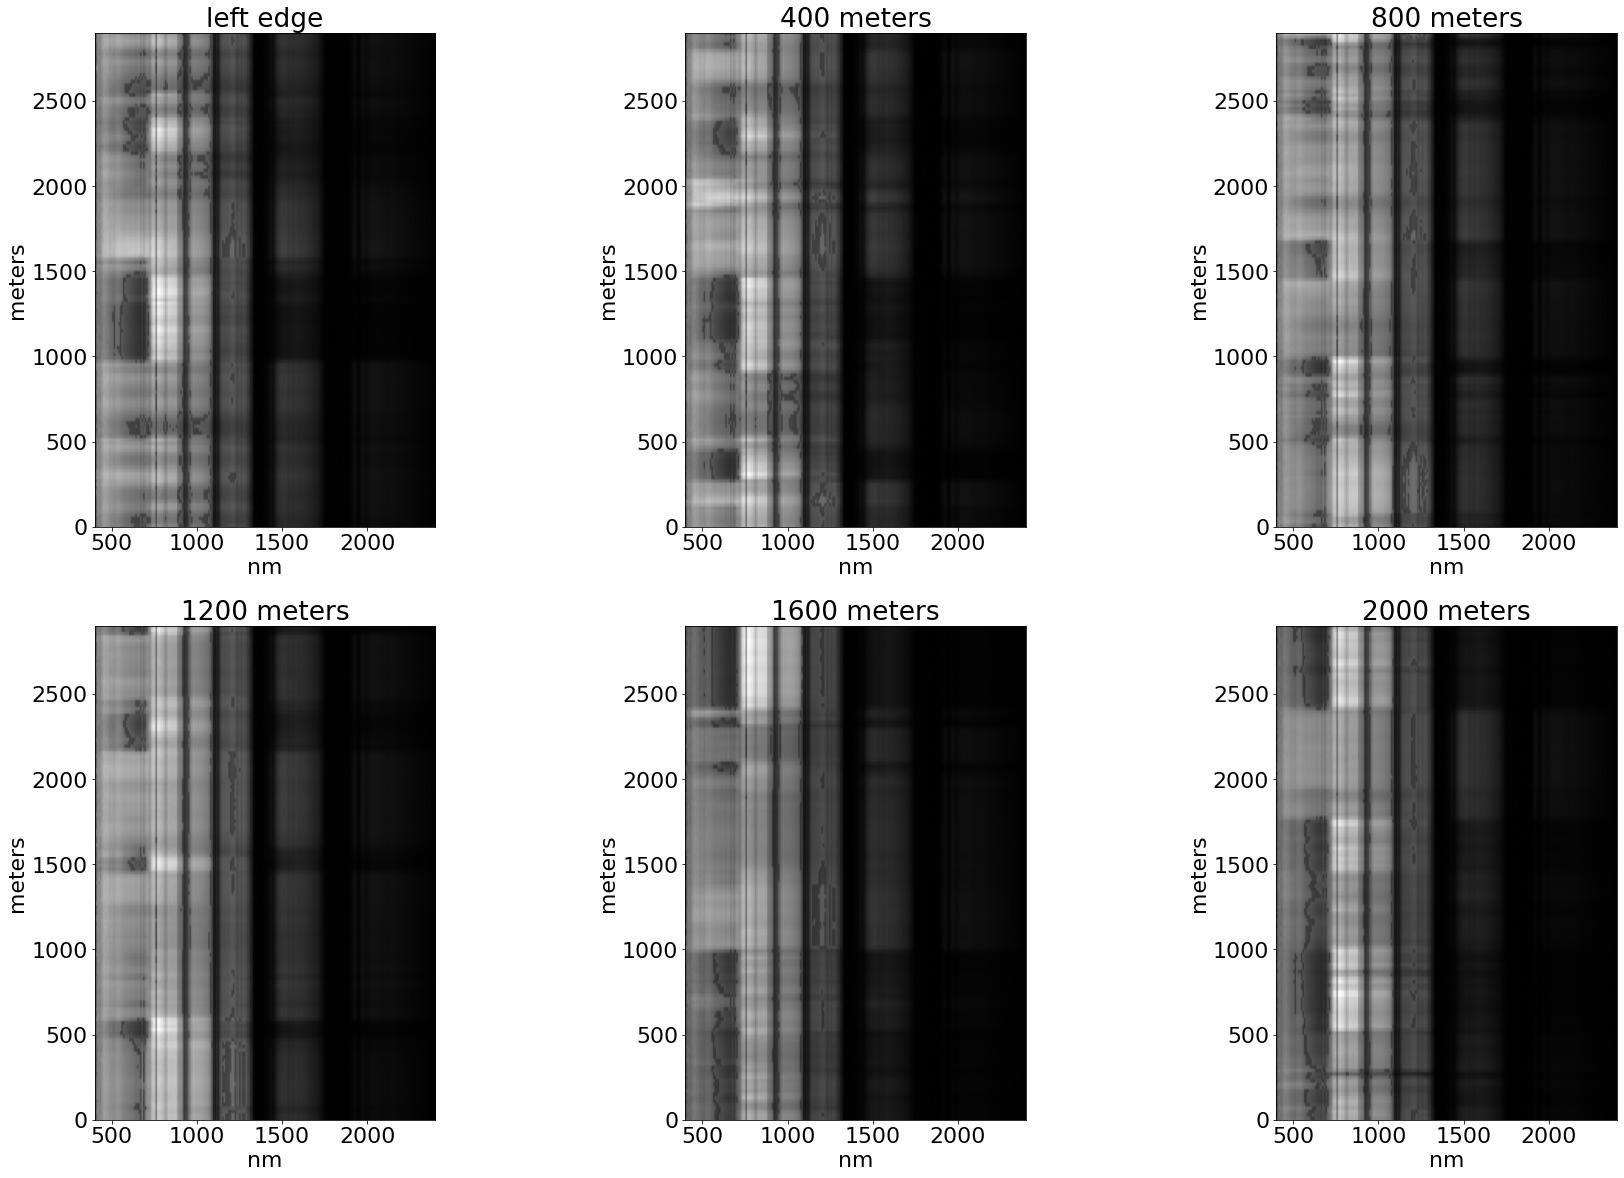

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.subplot(2,3,1)
plt.imshow(data[0,:,:], extent=[400,2400,0,2900], cmap='gray')
plt.xlabel('nm')
plt.ylabel('meters')
plt.title('left edge')
plt.subplot(2,3,2)
plt.imshow(data[20,:,:], extent=[400,2400,0,2900], cmap='gray')
plt.xlabel('nm')
plt.ylabel('meters')
plt.title('400 meters')
plt.subplot(2,3,3)
plt.imshow(data[40,:,:], extent=[400,2400,0,2900], cmap='gray')
plt.xlabel('nm')
plt.ylabel('meters')
plt.title('800 meters')
plt.subplot(2,3,4)
plt.imshow(data[60,:,:], extent=[400,2400,0,2900], cmap='gray')
plt.xlabel('nm')
plt.ylabel('meters')
plt.title('1200 meters')
plt.subplot(2,3,5)
plt.imshow(data[80,:,:], extent=[400,2400,0,2900], cmap='gray')
plt.xlabel('nm')
plt.ylabel('meters')
plt.title('1600 meters')
plt.subplot(2,3,6)
plt.imshow(data[100,:,:], extent=[400,2400,0,2900], cmap='gray')
plt.xlabel('nm')
plt.ylabel('meters')
plt.title('2000 meters')

plt.savefig('indianPinesSpectral.pdf')
#files.download('indianPinesSpectral.pdf')

## representative spectra and principal components

Text(0.5, 1.0, 'representative spectra')

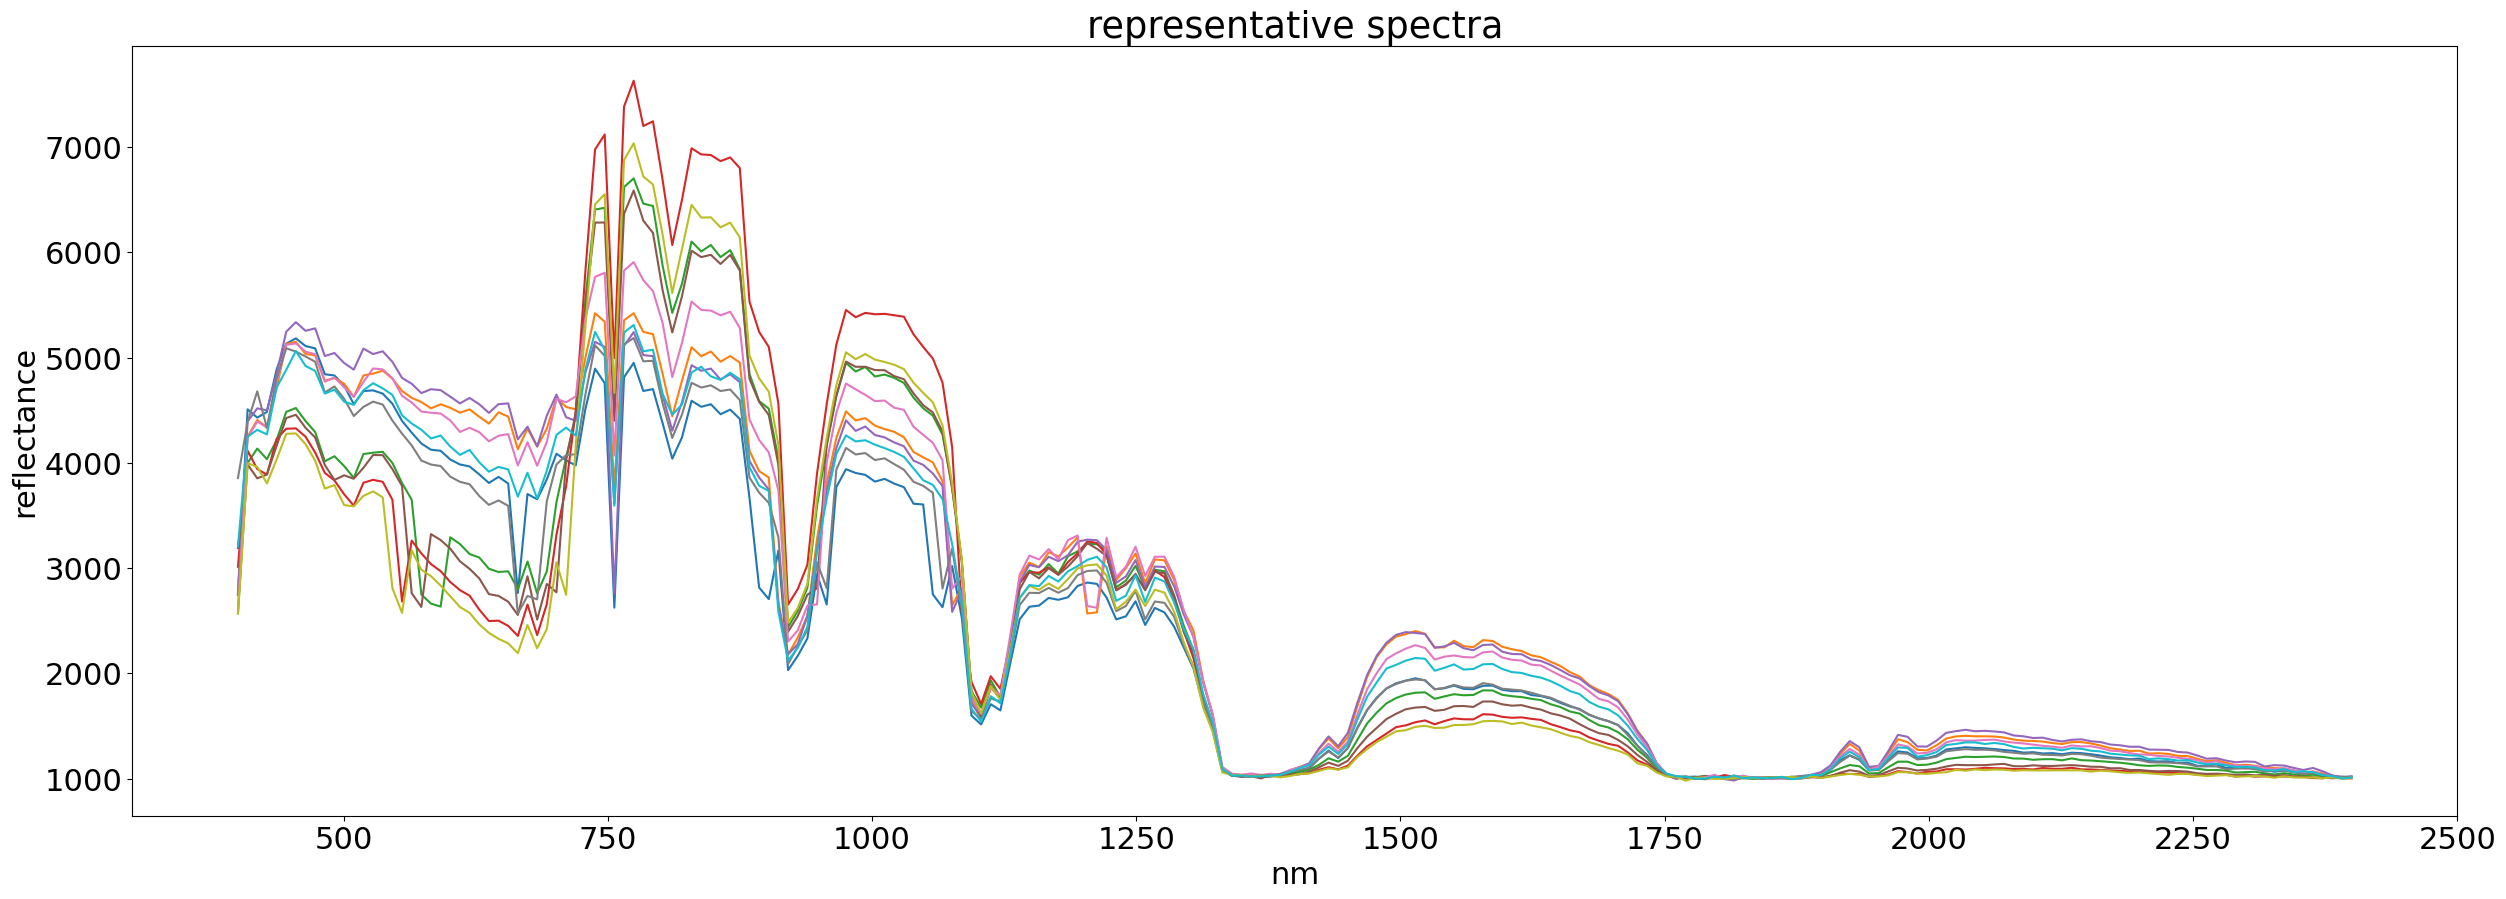

In [9]:
plt.figure(figsize=(30,10))
spectralrange=np.linspace(400,2400,220)
for spectraExample in range(10):
  x,y =np.random.randint(0,145,2)
  plt.plot(spectralrange,data[x,y,:])
plt.xlabel('nm')
plt.ylabel('reflectance')
plt.title('representative spectra')



In [12]:
pop=data.reshape(21025,220, order='F' )
pca=PCA(n_components=32)
pca.fit(pop)


PCA(n_components=32)

In [ ]:
print(pca.singular_values_/np.sum(pca.singular_values_))

[0.31771208 0.18622219 0.04695991 0.03479549 0.03200403 0.02760322
 0.02426974 0.02310885 0.02127489 0.02078734 0.01984955 0.01916499
 0.01819695 0.01670651 0.01580199 0.0151646  0.01502396 0.01410574
 0.01214815 0.01167479 0.01117833 0.01061365 0.00989648 0.00975438
 0.00953061 0.00909597 0.00894625 0.00871628 0.00787709 0.00731564
 0.00730562 0.00719473]


Text(0.5, 1.0, 'Principal Component Spectrum')

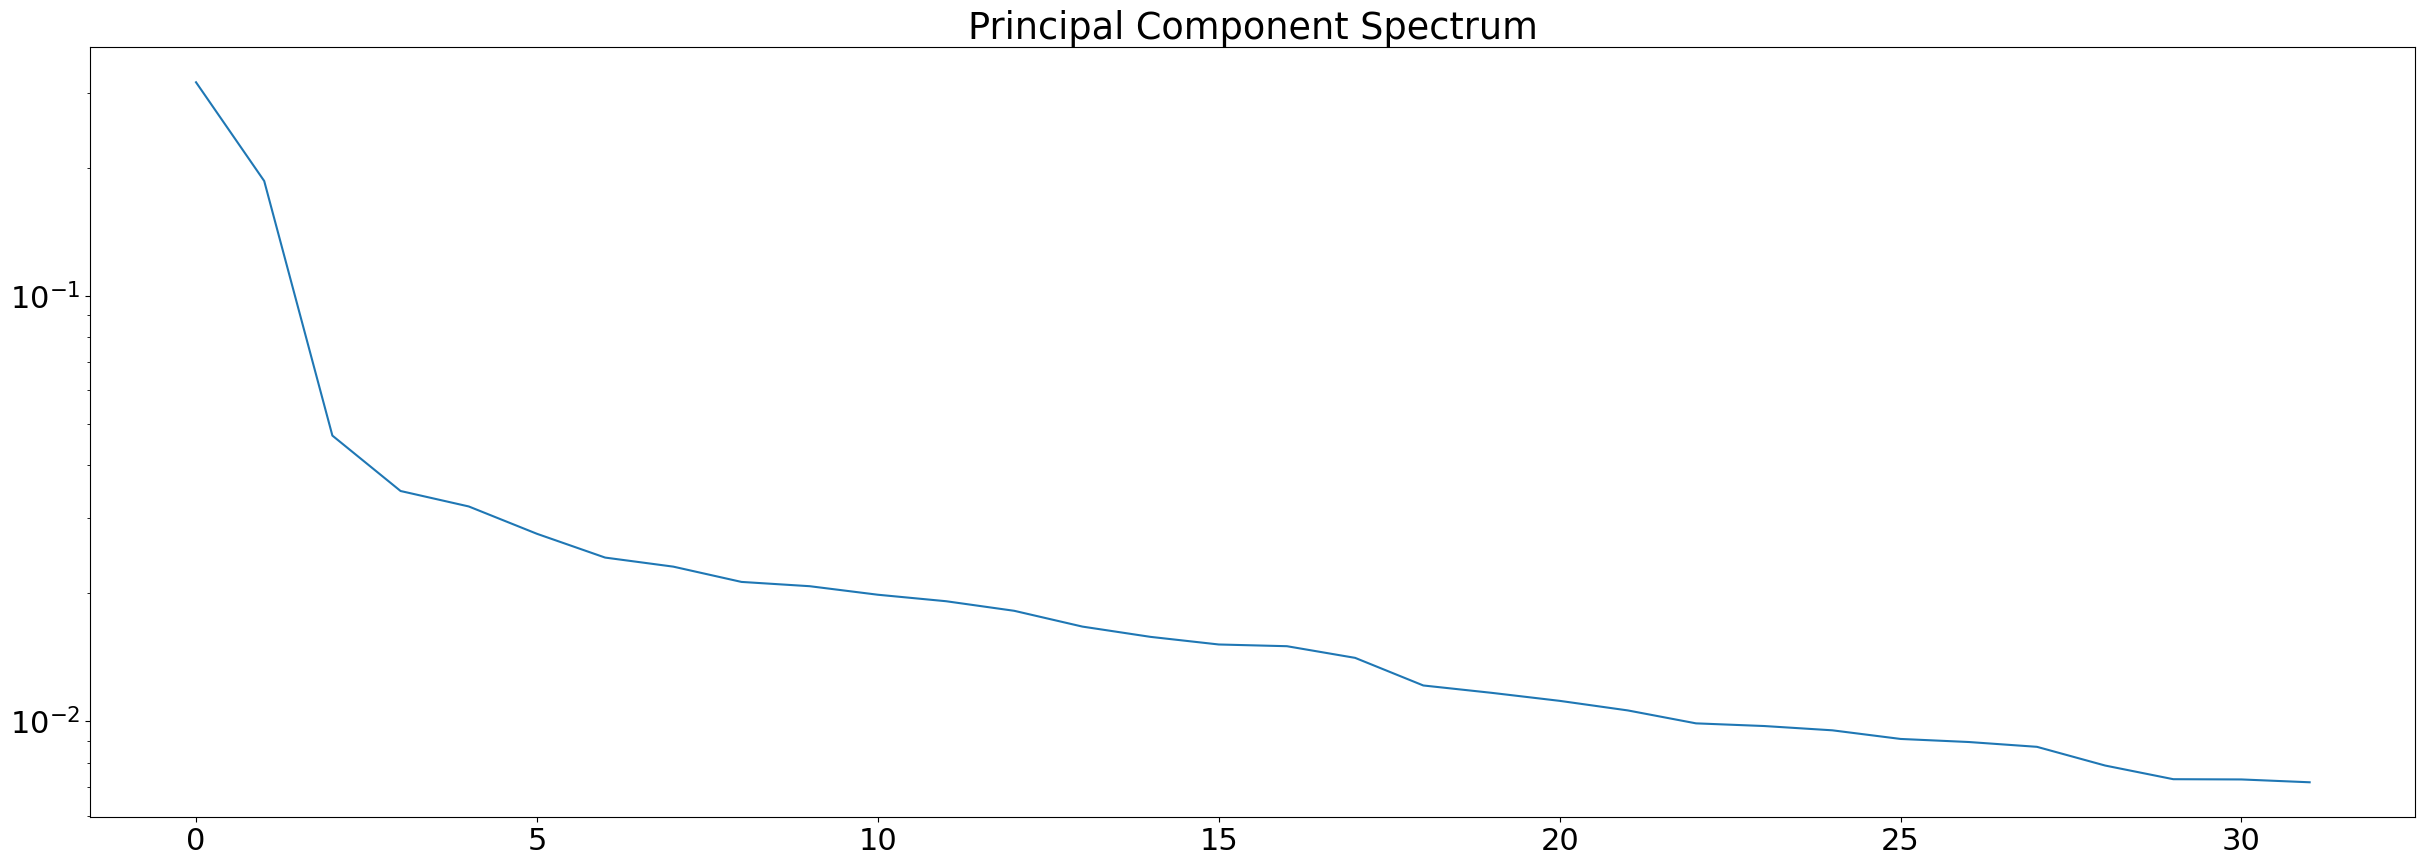

In [ ]:
plt.semilogy(pca.singular_values_/np.sum(pca.singular_values_))
plt.title('Principal Component Spectrum')


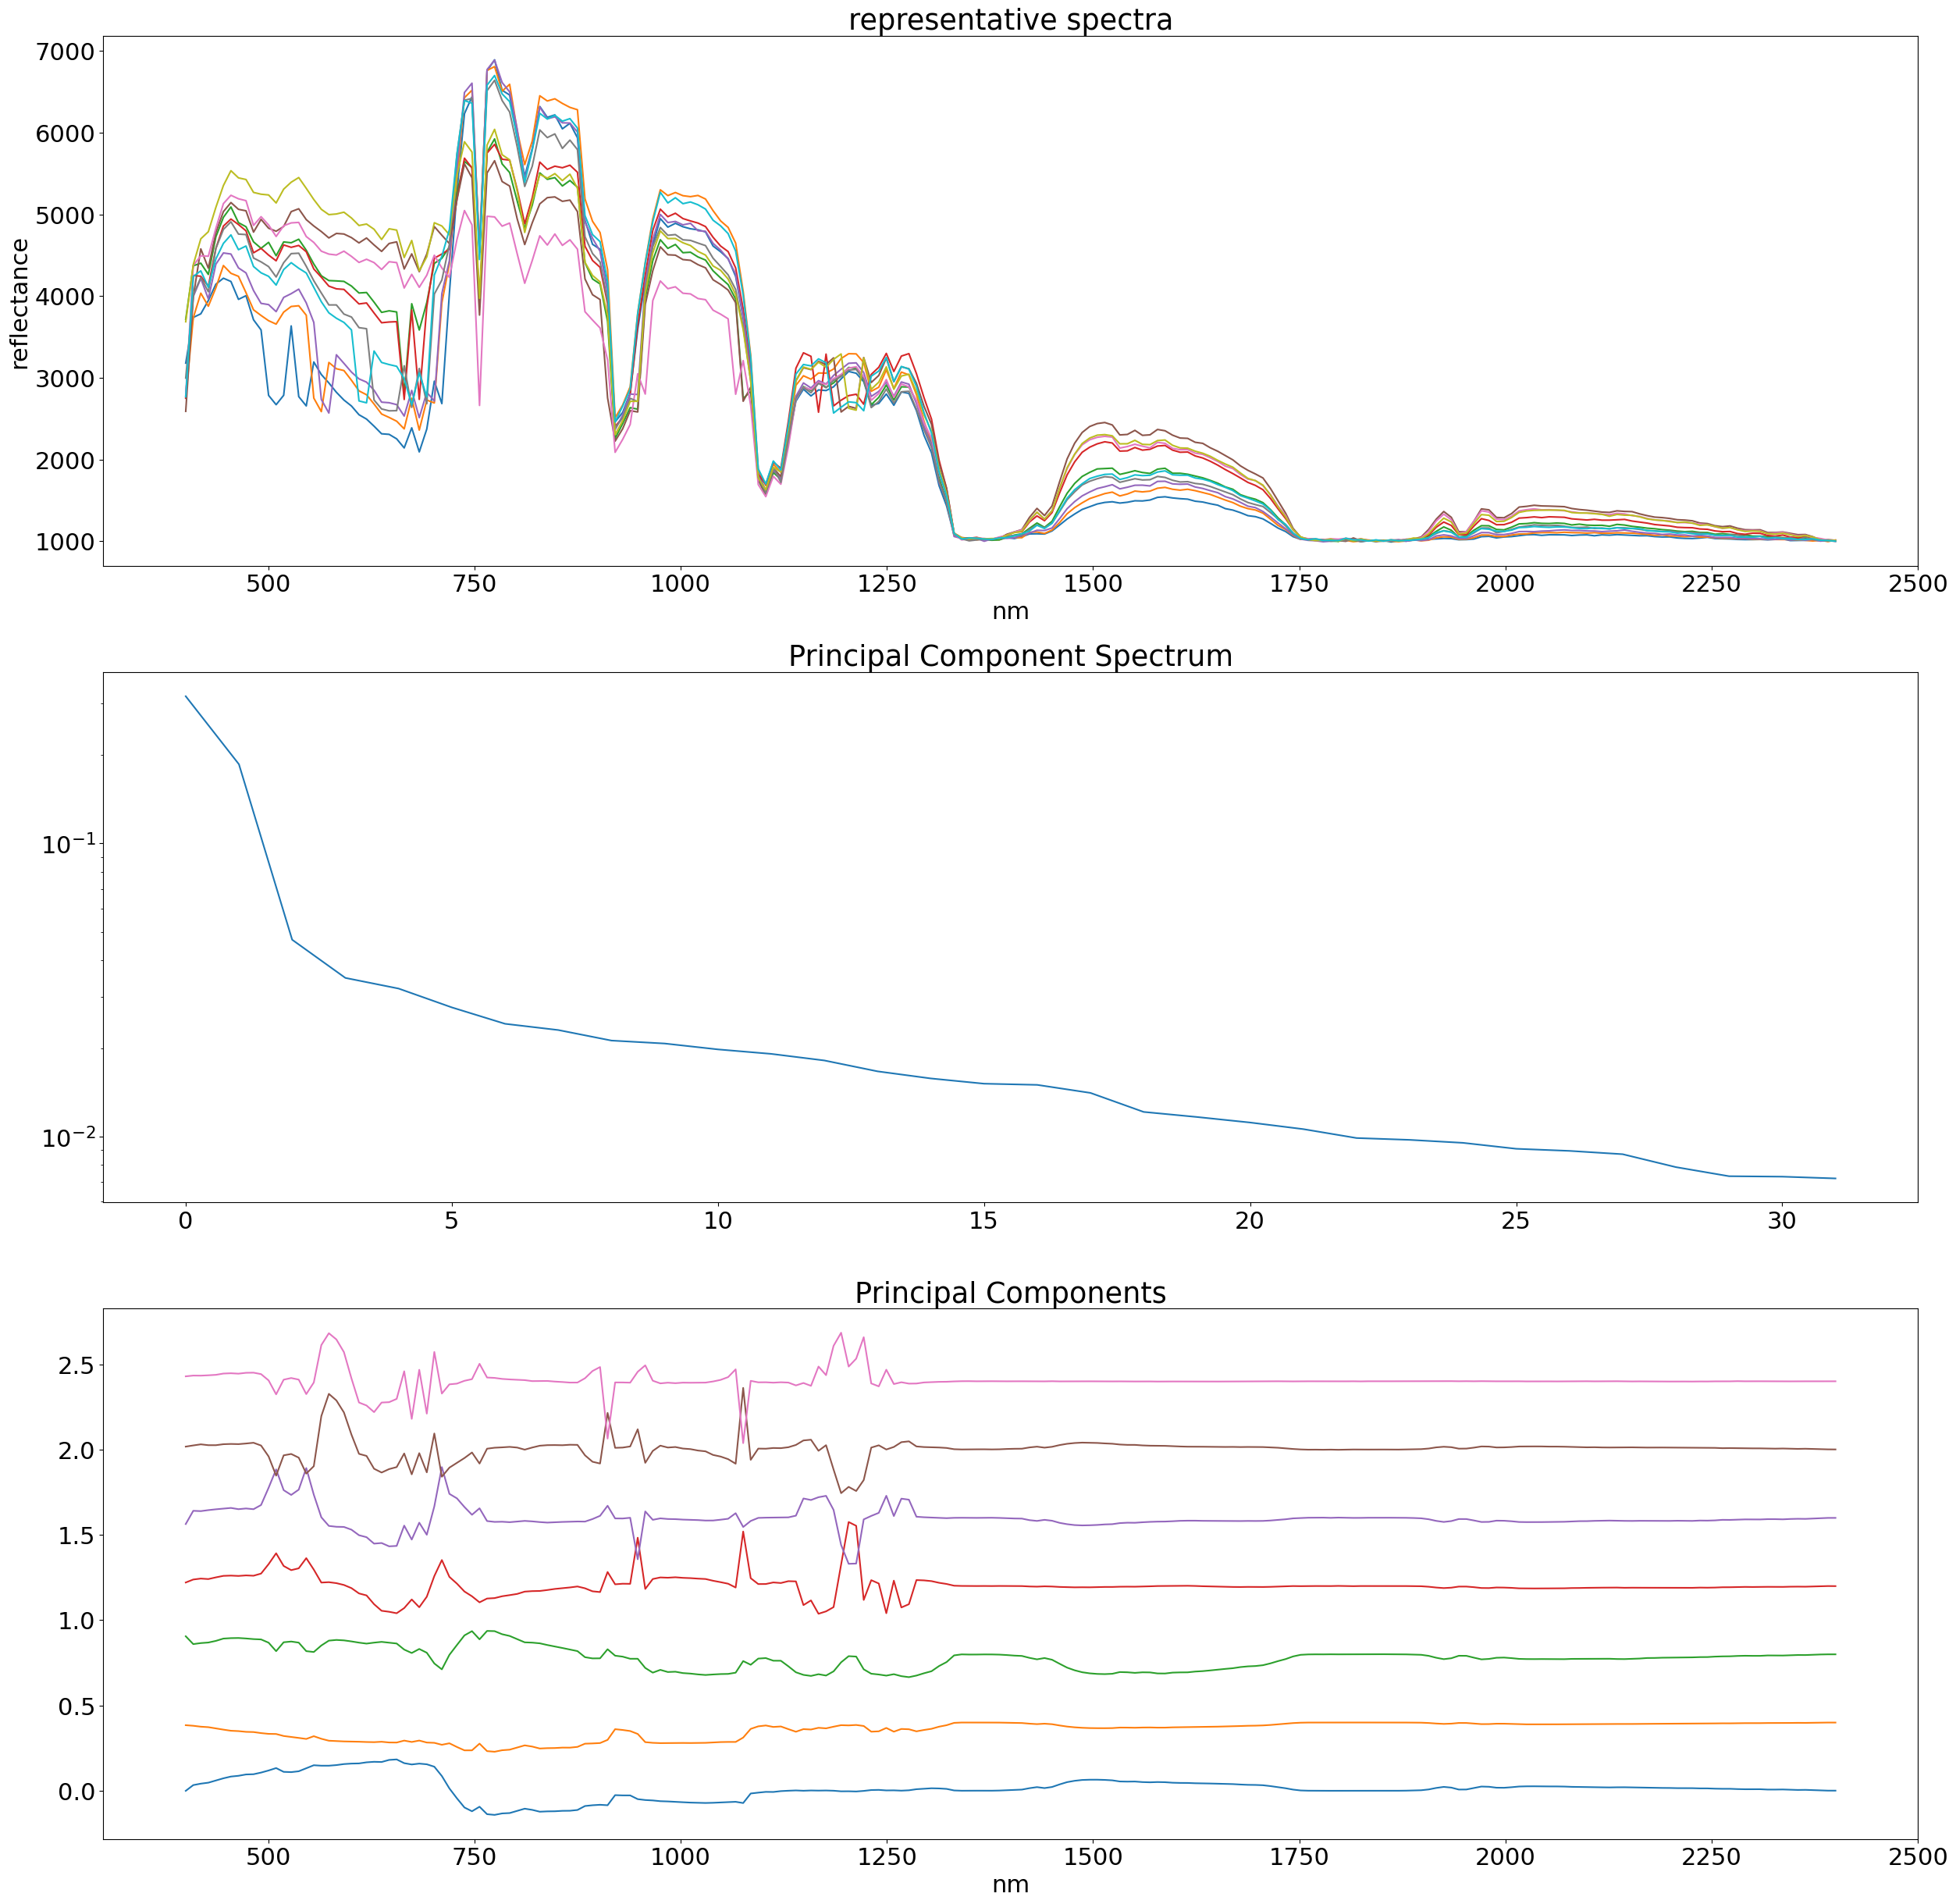

<Figure size 3000x1000 with 0 Axes>

In [13]:
plt.figure(figsize=(30,30))
plt.subplot(3,1,1)
for spectraExample in range(10):
  x,y =np.random.randint(0,145,2)
  plt.plot(spectralrange,data[x,y,:])
plt.xlabel('nm')
plt.ylabel('reflectance')
plt.title('representative spectra')
plt.subplot(3,1,2)
plt.semilogy(pca.singular_values_/np.sum(pca.singular_values_))
plt.title('Principal Component Spectrum')
plt.subplot(3,1,3)
for component in range(7):
  plt.plot(spectralrange,pca.components_[component,:]+.4*component)
plt.title('Principal Components')
plt.xlabel('nm')
plt.show()
plt.savefig('indianPinesPCA.pdf')


In [ ]:
spectralSamplingMatrix=.5-np.random.random(size=(220,32))



## Visible spectral images of common objects

Here we consider spectral images taken with a tunable filter of color beads. The dataset is from

"Generalized Assorted Pixel Camera: Post-Capture Control of Resolution, Dynamic Range and Spectrum,"
F. Yasuma, T. Mitsunaga, D. Iso, and S.K. Nayar,
Technical Report, Department of Computer Science, Columbia University CUCS-061-08,
Nov. 2008.
on line at https://www1.cs.columbia.edu/CAVE/databases/multispectral/

reflection images are included in 10 nm steps over the range from 400 nm to 700 nm, resulting in 31 data planes


In [ ]:
!wget https://www1.cs.columbia.edu/CAVE/databases/multispectral/zip/beads_ms.zip
!unzip beads_ms.zip
!rm beads_ms.zip


--2023-10-30 14:44:55--  https://www1.cs.columbia.edu/CAVE/databases/multispectral/zip/beads_ms.zip
Resolving www1.cs.columbia.edu (www1.cs.columbia.edu)... 128.59.11.206
Connecting to www1.cs.columbia.edu (www1.cs.columbia.edu)|128.59.11.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14522325 (14M) [application/zip]
Saving to: ‘beads_ms.zip.1’

beads_ms.zip.1      100%[===================>]  13.85M  14.0MB/s    in 1.0s    

2023-10-30 14:44:56 (14.0 MB/s) - ‘beads_ms.zip.1’ saved [14522325/14522325]

Archive:  beads_ms.zip
   creating: beads_ms/
  inflating: beads_ms/beads_ms_01.png  
  inflating: beads_ms/beads_ms_02.png  
  inflating: beads_ms/beads_ms_03.png  
  inflating: beads_ms/beads_ms_04.png  
  inflating: beads_ms/beads_ms_05.png  
  inflating: beads_ms/beads_ms_06.png  
  inflating: beads_ms/beads_ms_07.png  
  inflating: beads_ms/beads_ms_08.png  
  inflating: beads_ms/beads_ms_09.png  
  inflating: beads_ms/beads_ms_10.png  
  inflating: bea

In [27]:
cd beads_ms/

C:\Users\djbrady\beads_ms\beads_ms


In [28]:
dataSet=np.zeros((512,512,31))
for ct in range(31):
  if ct <9:
    fileName='beads_ms_0'+str(ct+1)+'.png'
  else:
    fileName='beads_ms_'+str(ct+1)+'.png'
  dataSet[:,:,ct]=plt.imread(fileName)




## Principal components of spectral features

Here we consider each pixel as an independent spectral signature. we randomly select 4000 pixels and characterize the spectral feature using PCA.

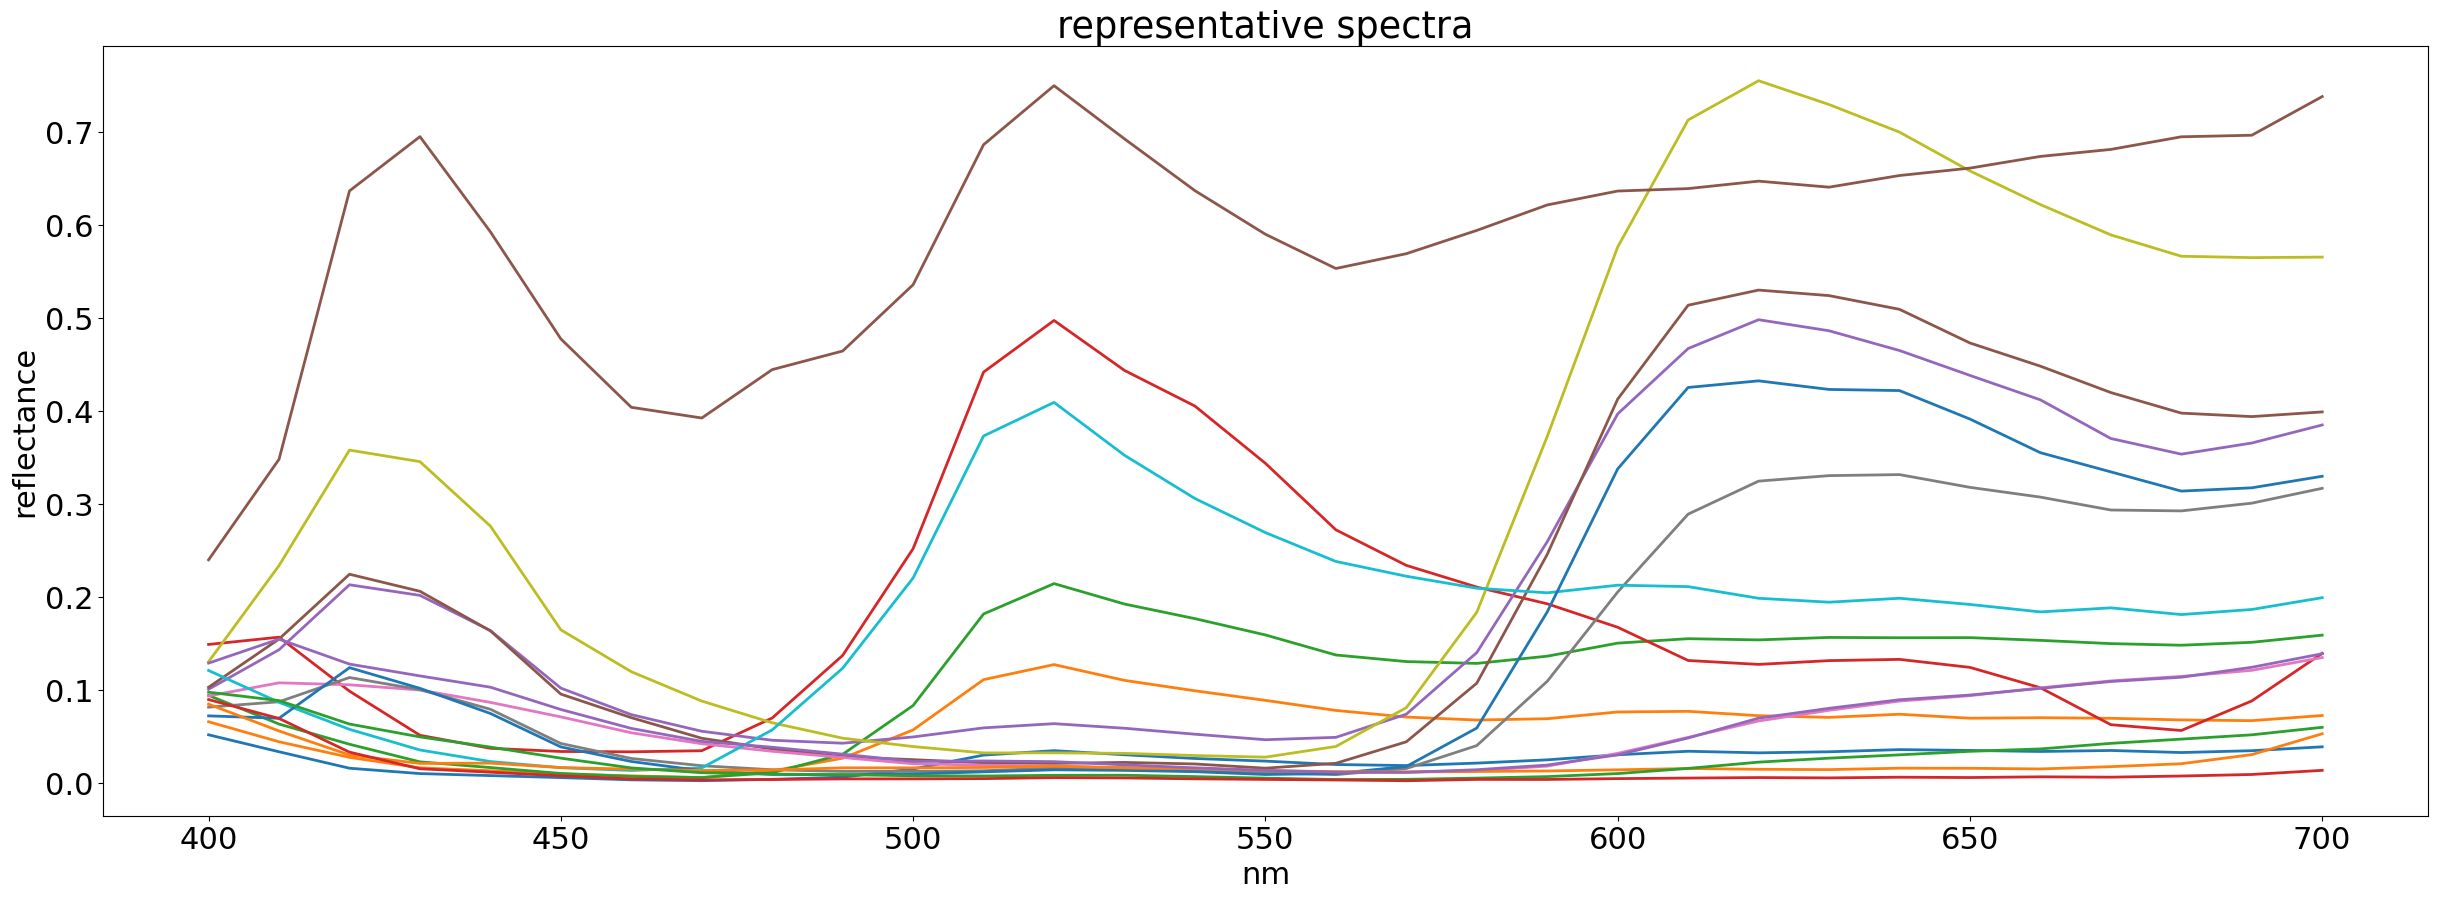

In [32]:
plt.figure(figsize=(30,10))
spectralrange=np.linspace(400,700,31)
for spectraExample in range(16):
  x,y =np.random.randint(0,512,2)
  plt.plot(spectralrange,dataSet[x,y,:], linewidth=2)
plt.xlabel('nm')
plt.ylabel('reflectance')
plt.title('representative spectra')
plt.show()

In [75]:
samplePoints=np.random.randint(64,448,(4000,2))
randomDownSample=dataSet[samplePoints[:,0],samplePoints[:,1],:]




In [76]:
pca=PCA(n_components=16)
pca.fit(randomDownSample)


PCA(n_components=16)

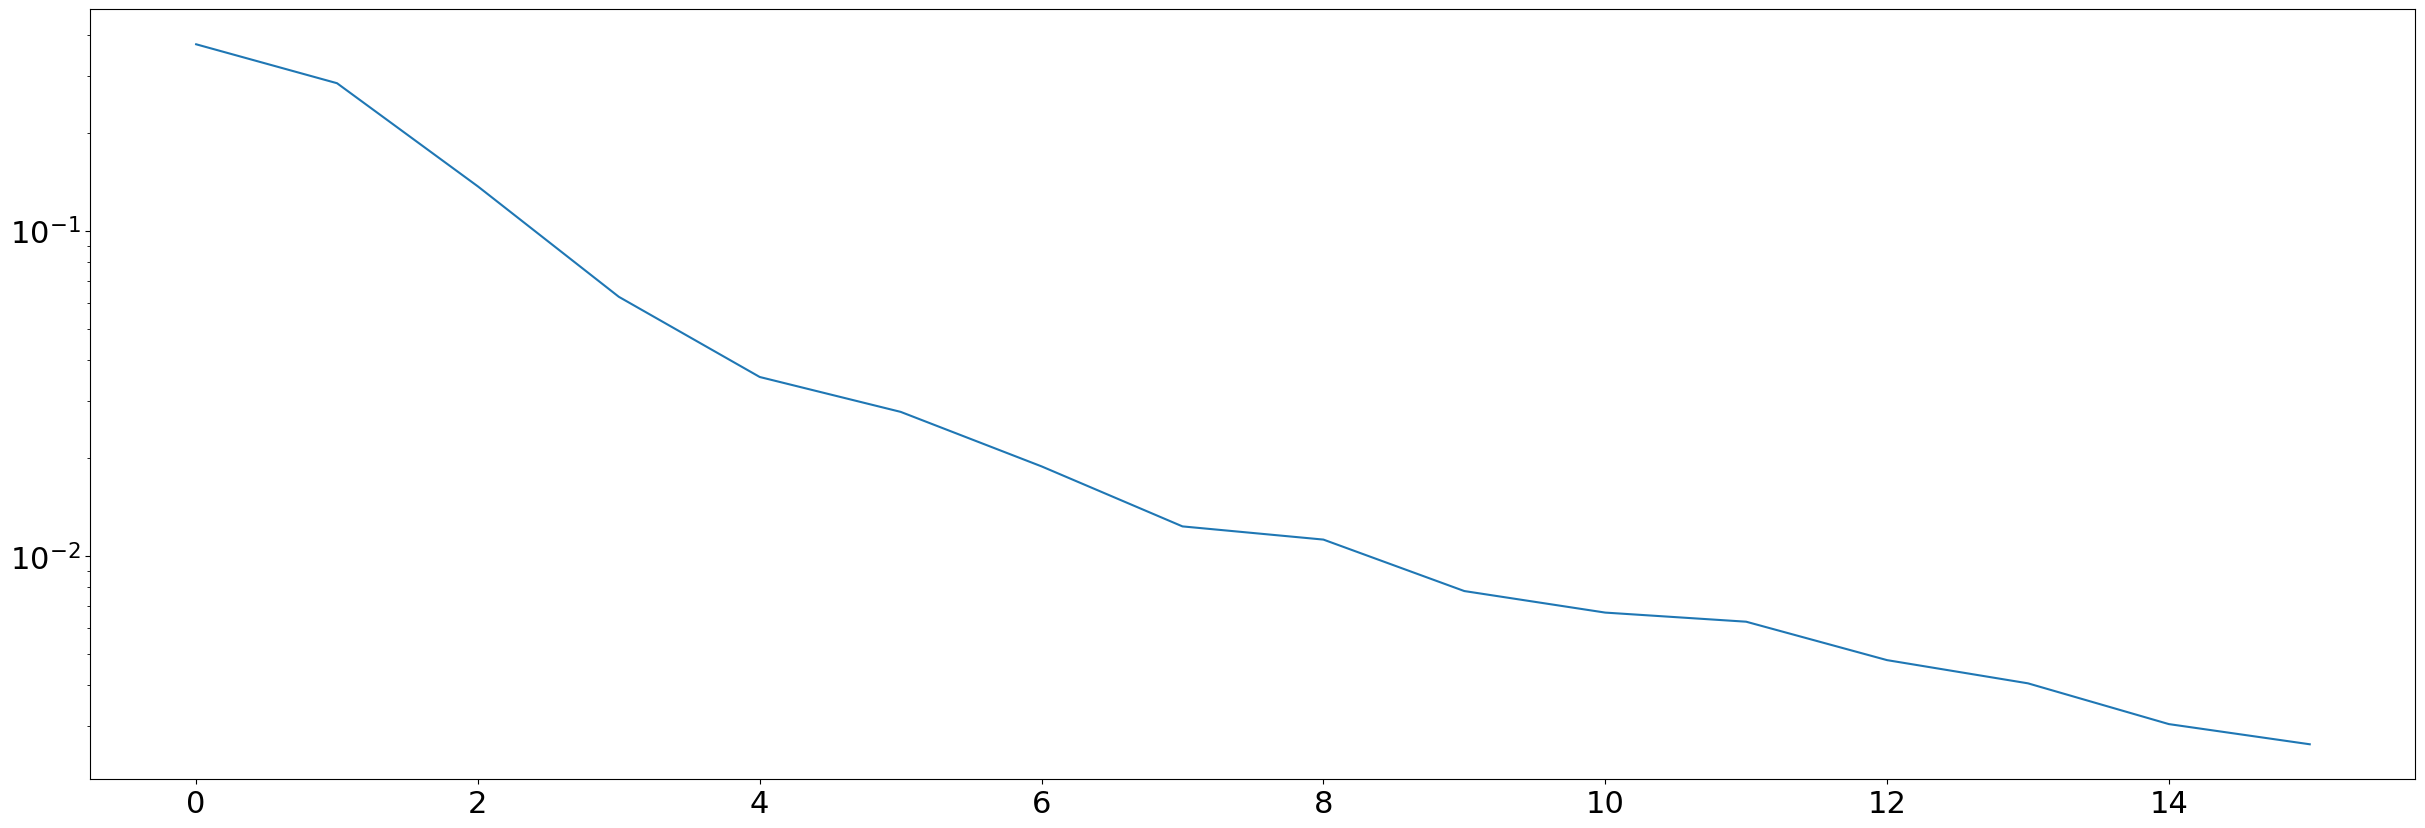

In [70]:
plt.semilogy(pca.singular_values_/np.sum(pca.singular_values_))

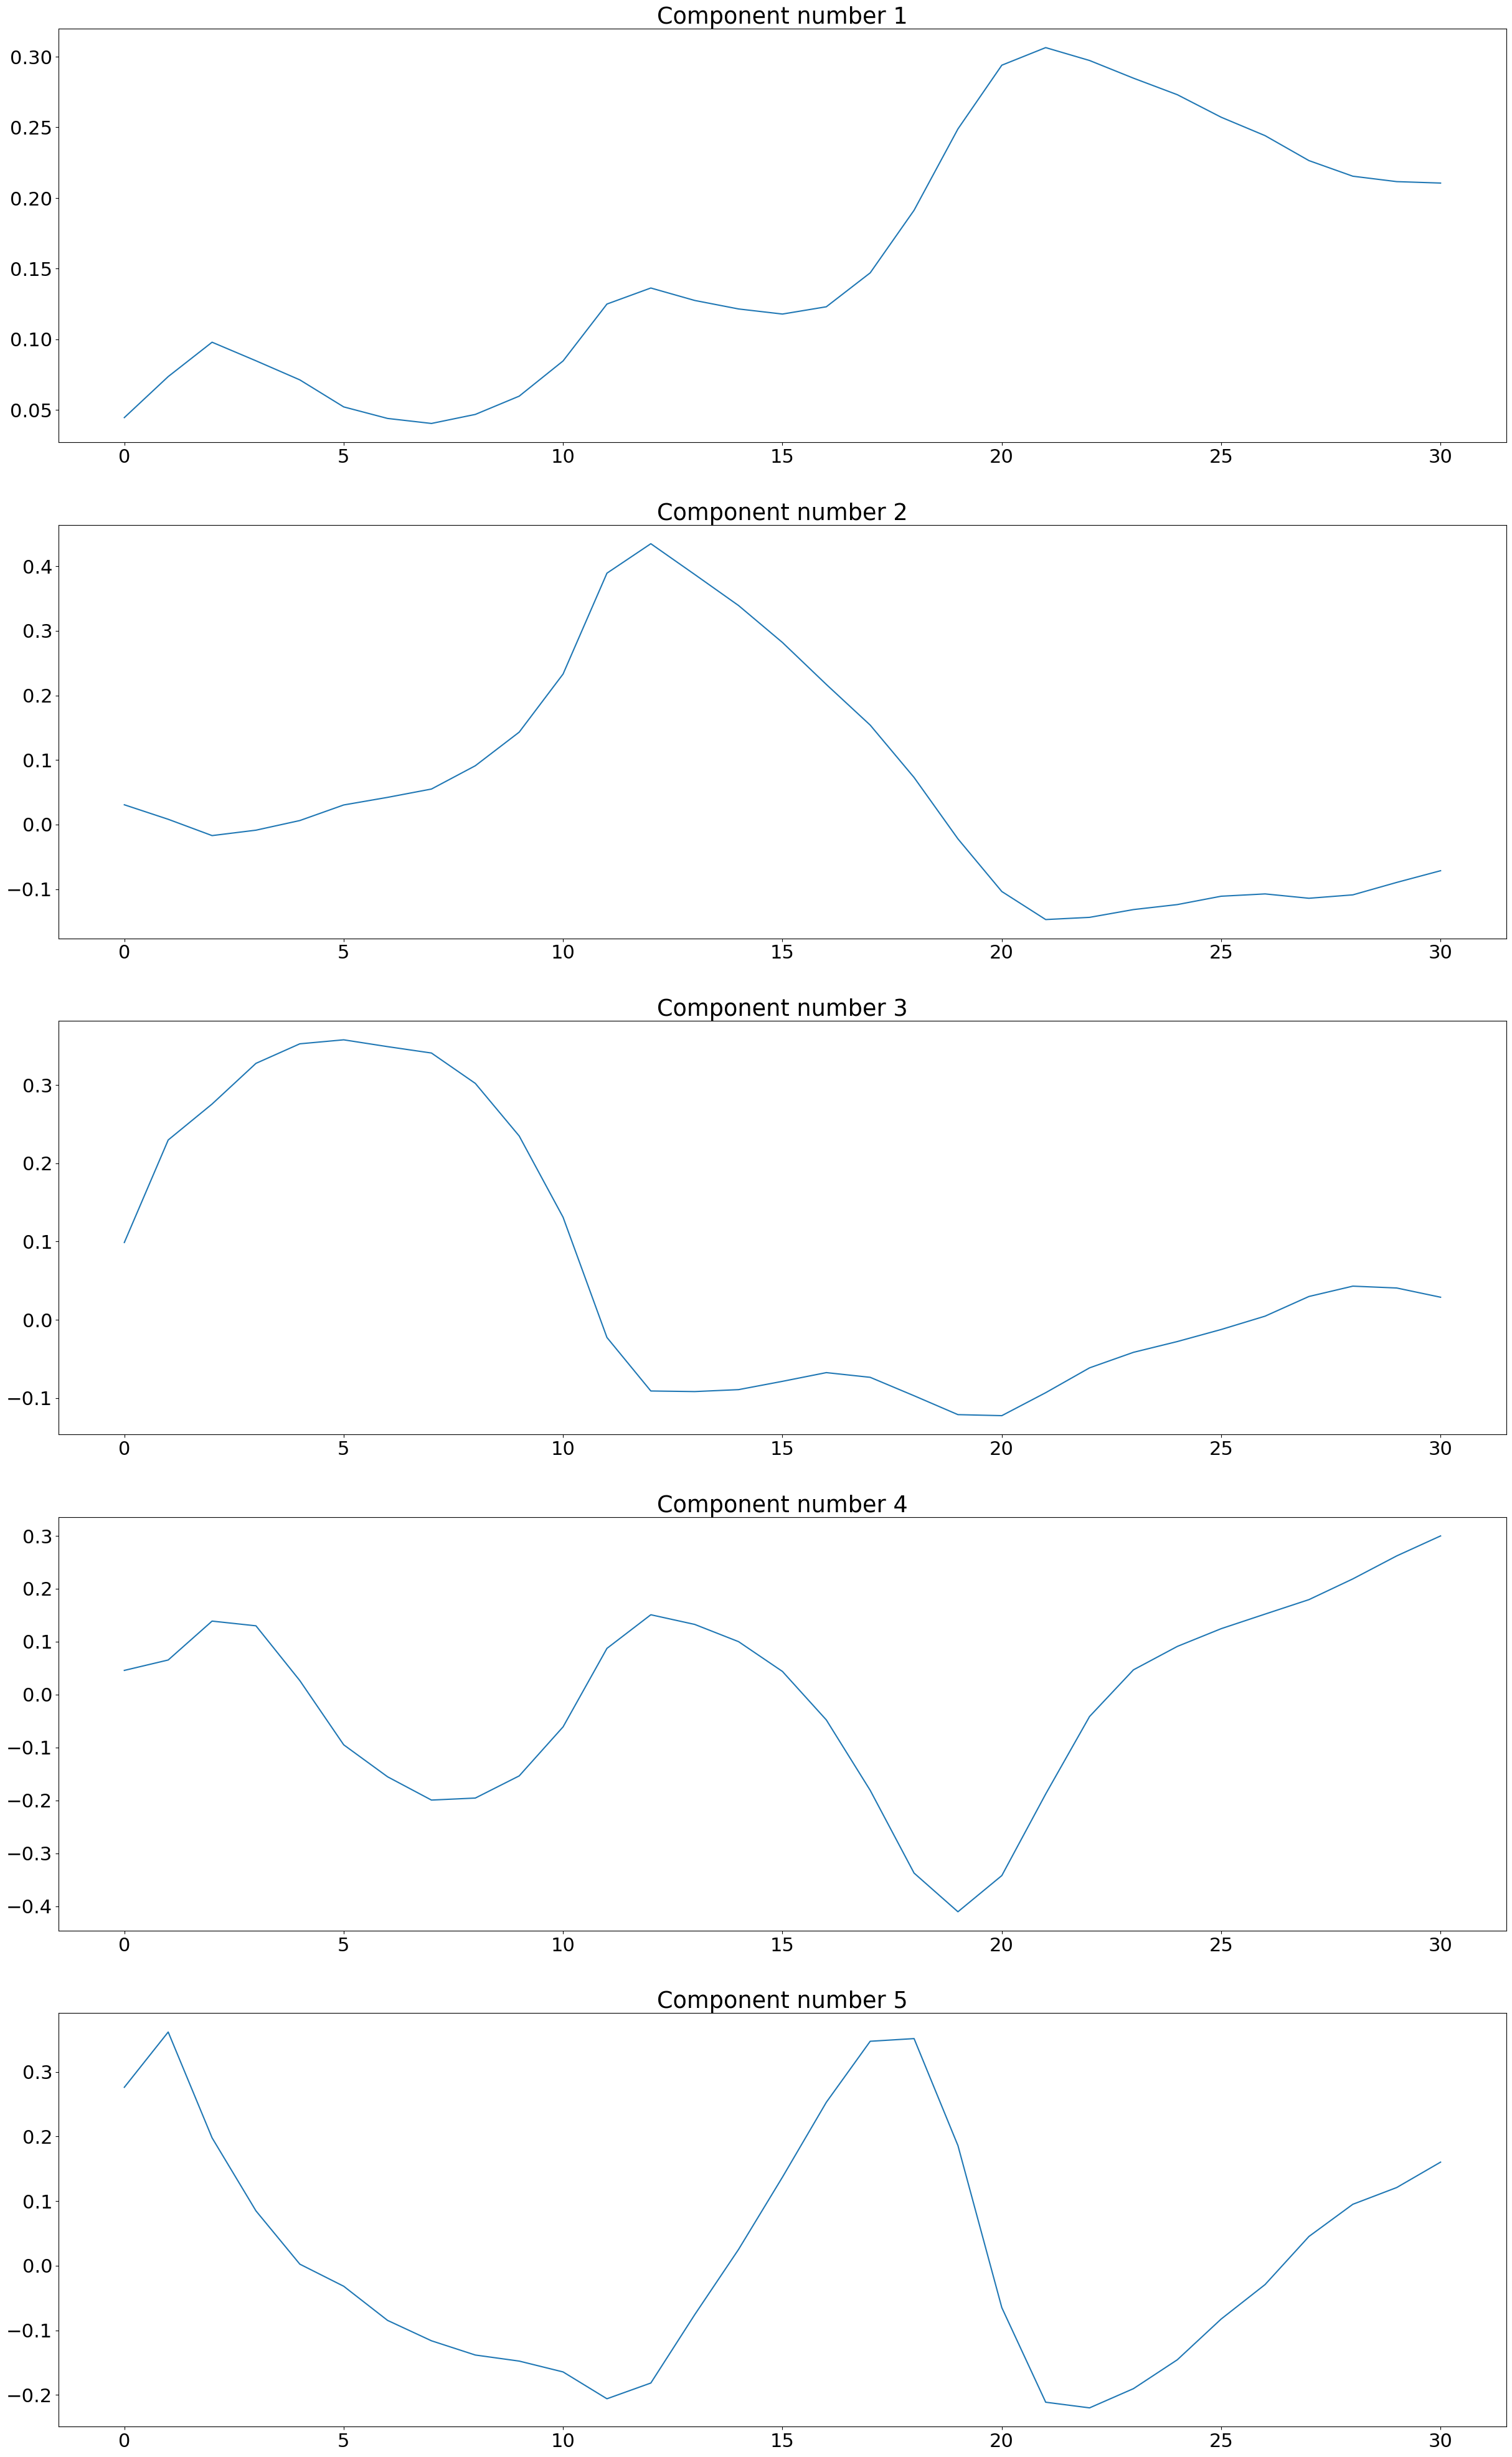

In [ ]:
plt.figure(figsize=(30,50))
for component in range(5):
  plt.subplot(5,1,component+1)
  plt.plot(pca.components_[component,:])
  plt.title('Component number '+str(component+1))

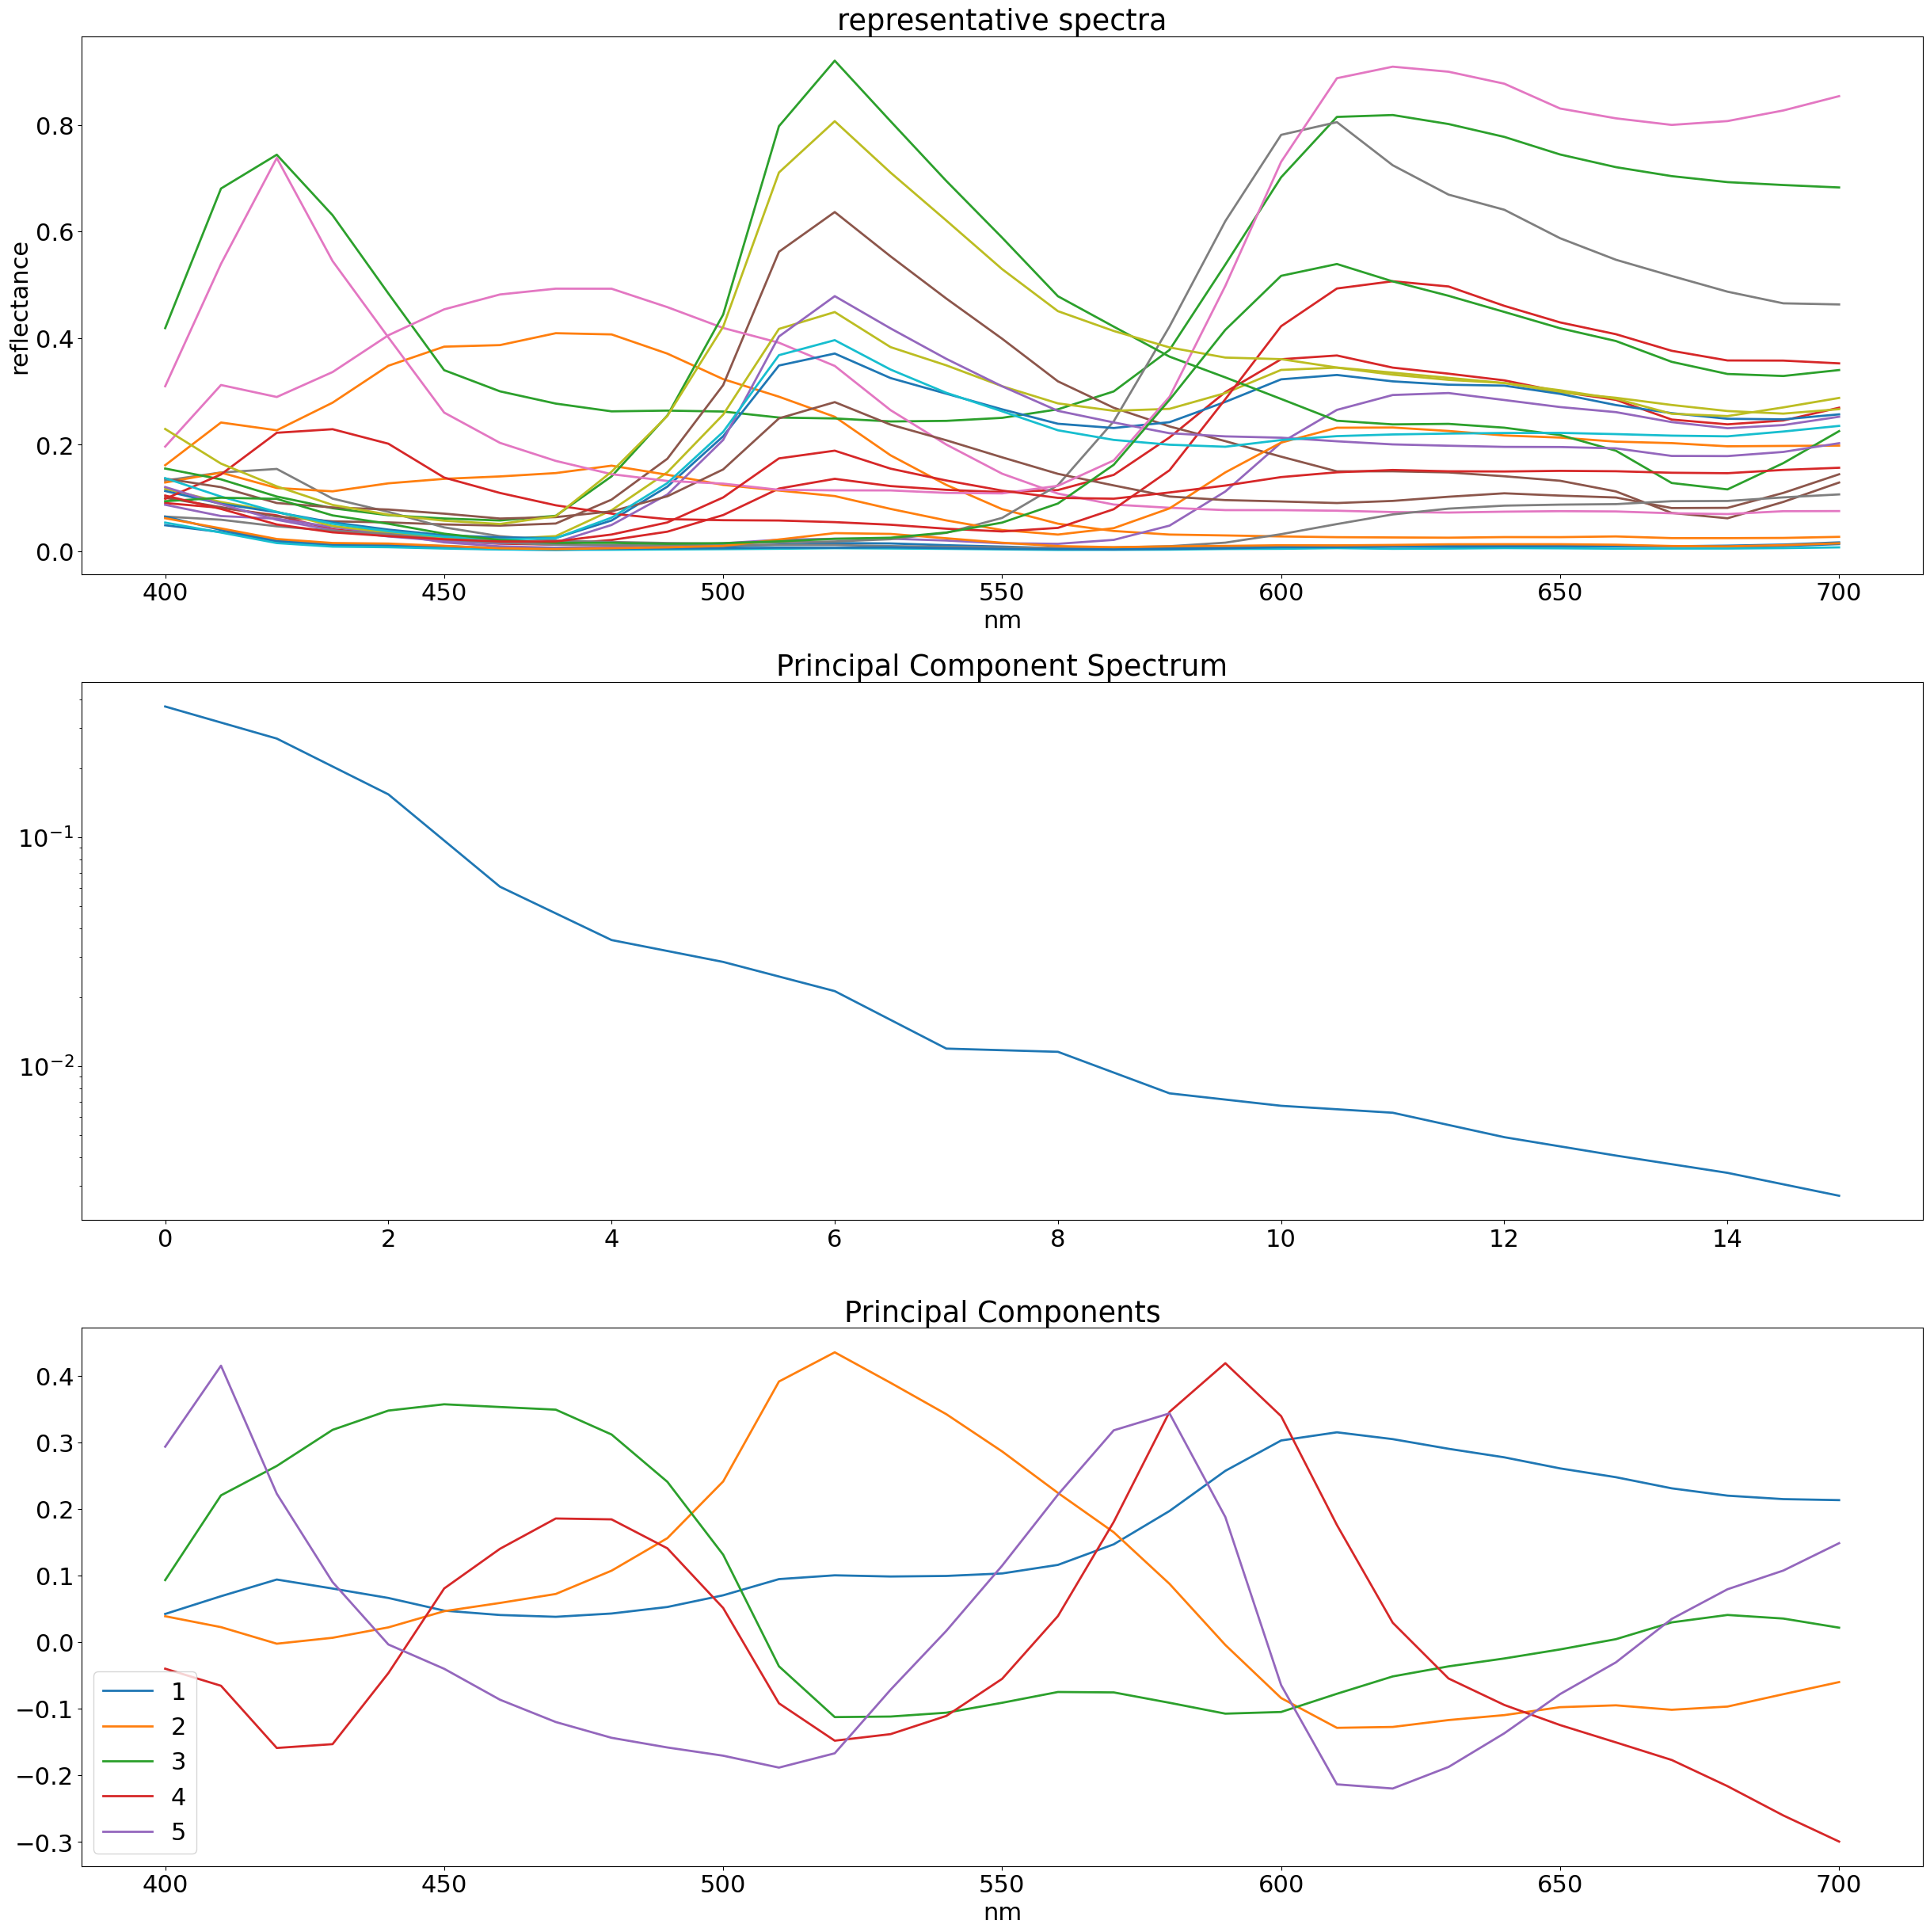

<Figure size 3000x1000 with 0 Axes>

In [77]:
plt.figure(figsize=(30,30))
plt.subplot(3,1,1)
spectralrange=np.linspace(400,700,31)
for spectraExample in range(24):
  x,y =np.random.randint(64,448,2)
  plt.plot(spectralrange,dataSet[x,y,:], linewidth=2)
plt.xlabel('nm')
plt.ylabel('reflectance')
plt.title('representative spectra')
plt.subplot(3,1,2)
plt.semilogy(pca.singular_values_/np.sum(pca.singular_values_),linewidth=2)
plt.title('Principal Component Spectrum')
plt.subplot(3,1,3)
for component in range(5):
  plt.plot(spectralrange,pca.components_[component,:],linewidth=2)
plt.title('Principal Components')
plt.legend(['1','2','3','4','5'])
plt.xlabel('nm')
plt.show()
plt.savefig('beadsPCA.pdf')

In [66]:
512-128

384

## Spatio-spectral Features

Now we consider 2D spatio-spectral slices of the spectral data cube as examlpe measurements. Each slice consists of 16 spatial pixels and 31 spectral values.

In [78]:
slices=4000
samplePoints=np.random.randint(64,448,(slices,2))
randomSlices=np.zeros((slices,np.uint16(16*31)))
for pip in range(slices):
  for pop in range(16):
    randomSlices[pip,np.uint16((pop*31)):np.uint16((pop+1)*31)]=dataSet[samplePoints[pip,0],samplePoints[pip,1]+pop,:]








In [79]:
pca=PCA(n_components=128)
pca.fit(randomSlices)


PCA(n_components=128)

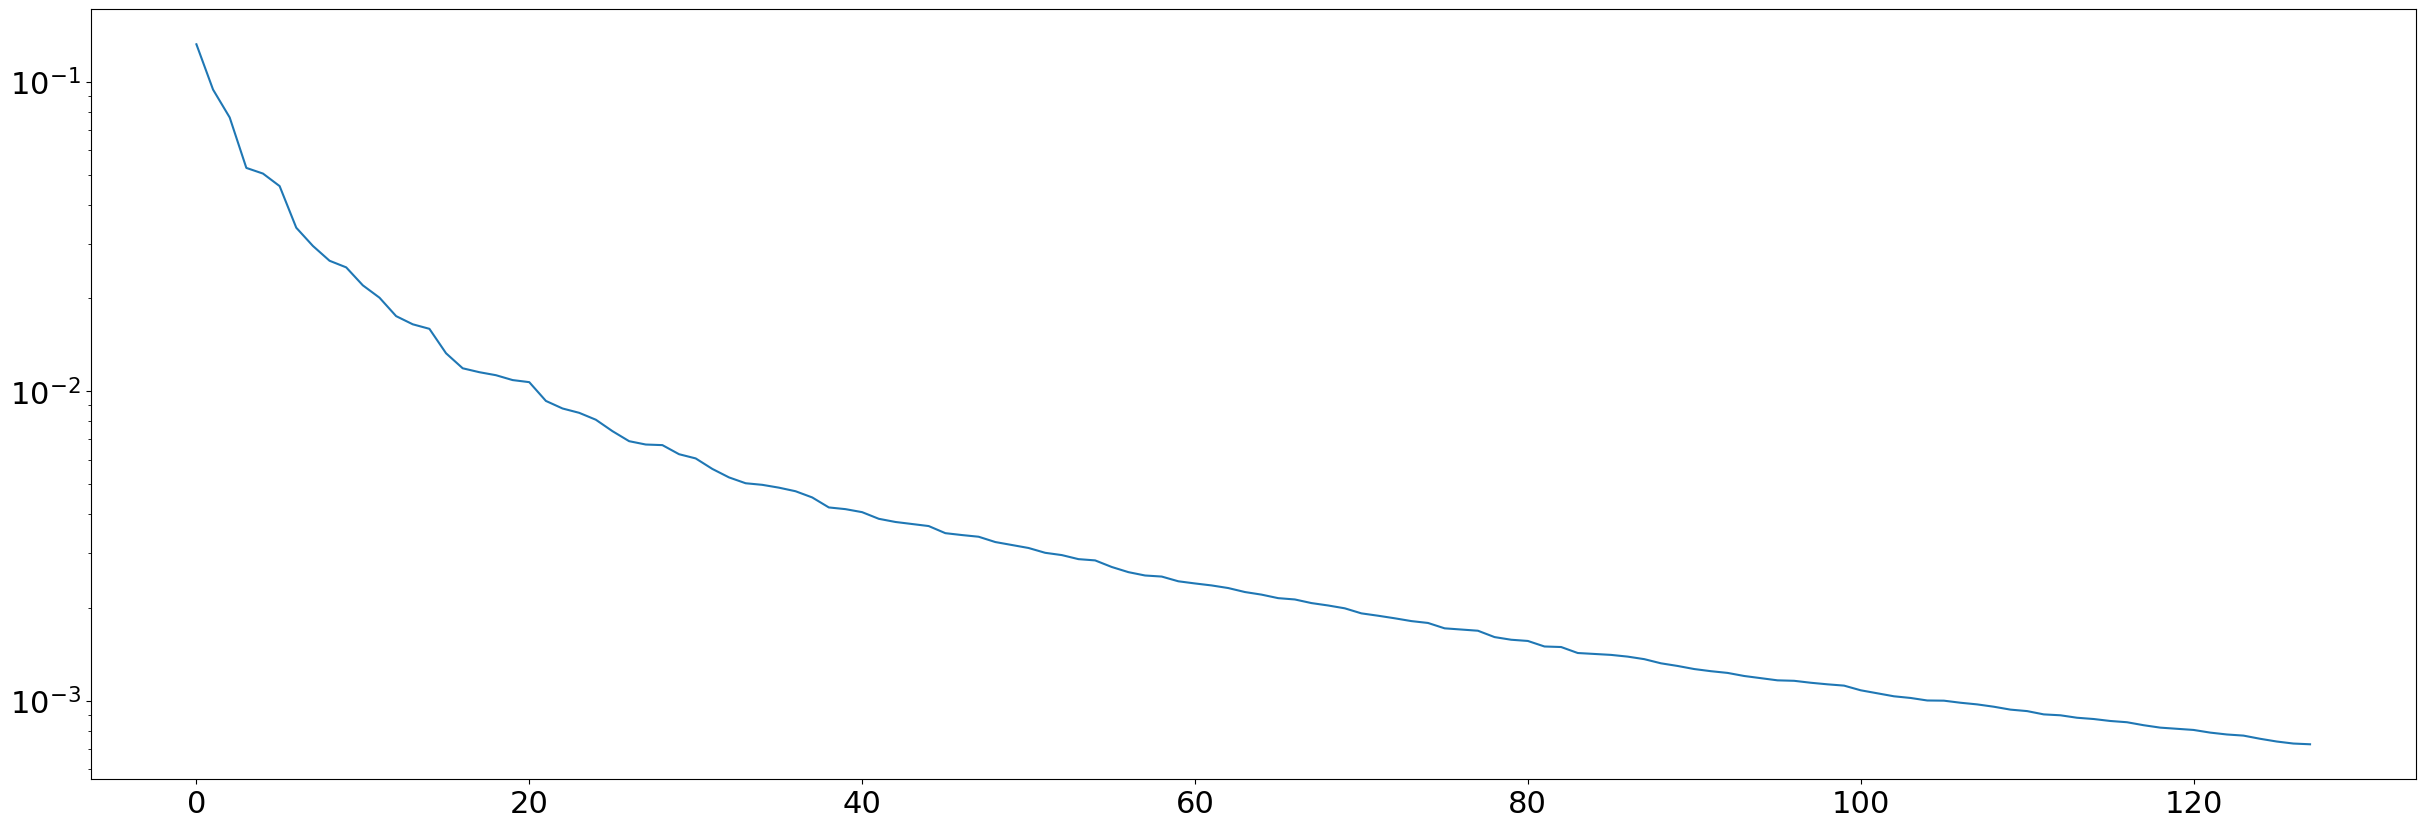

In [80]:
plt.semilogy(pca.singular_values_/np.sum(pca.singular_values_))

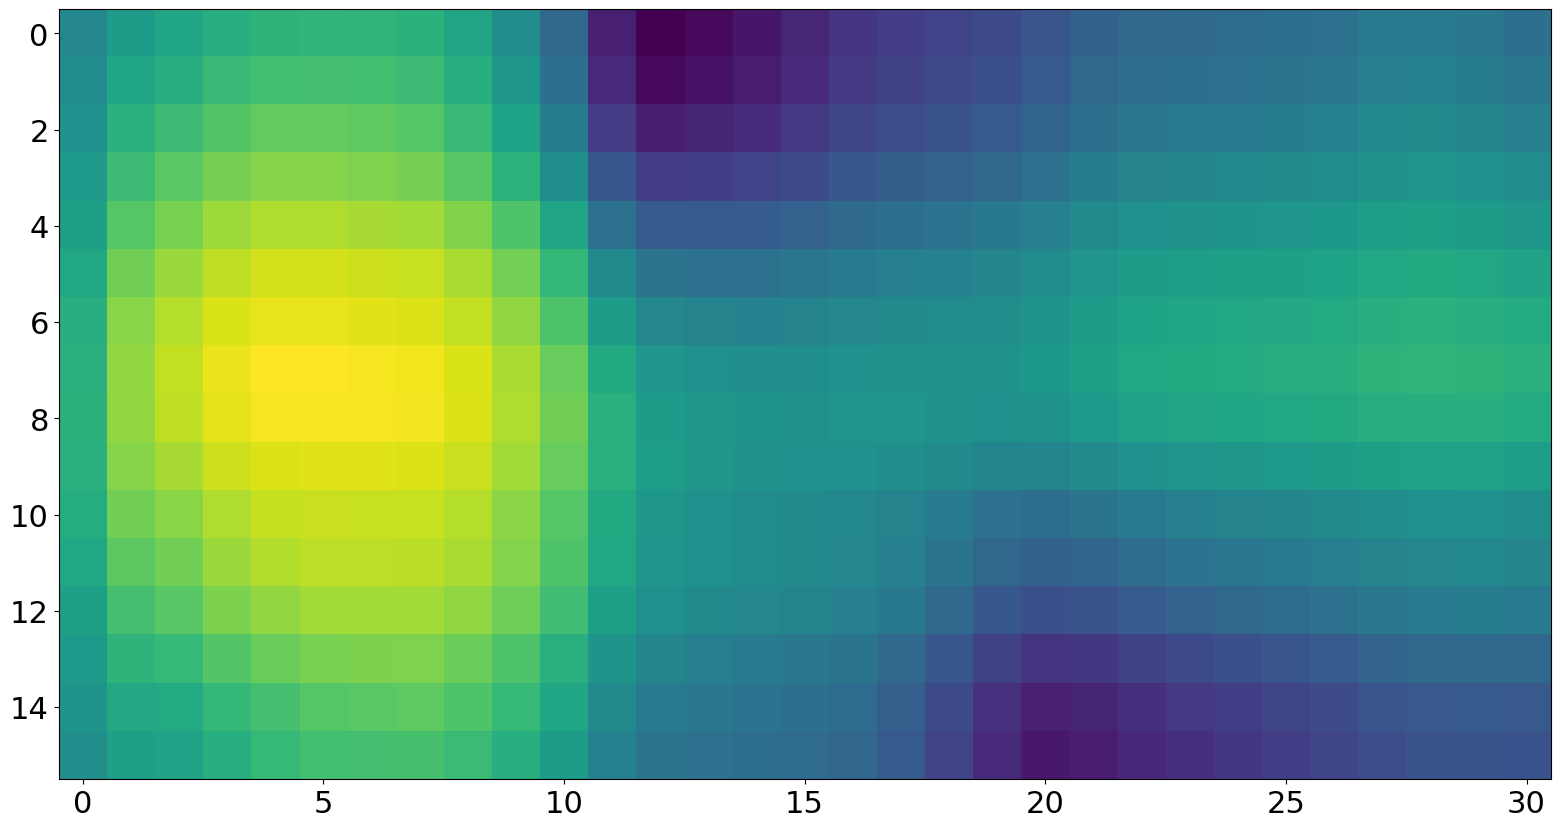

In [60]:
plt.imshow(pca.components_[3,:].reshape(16,31))


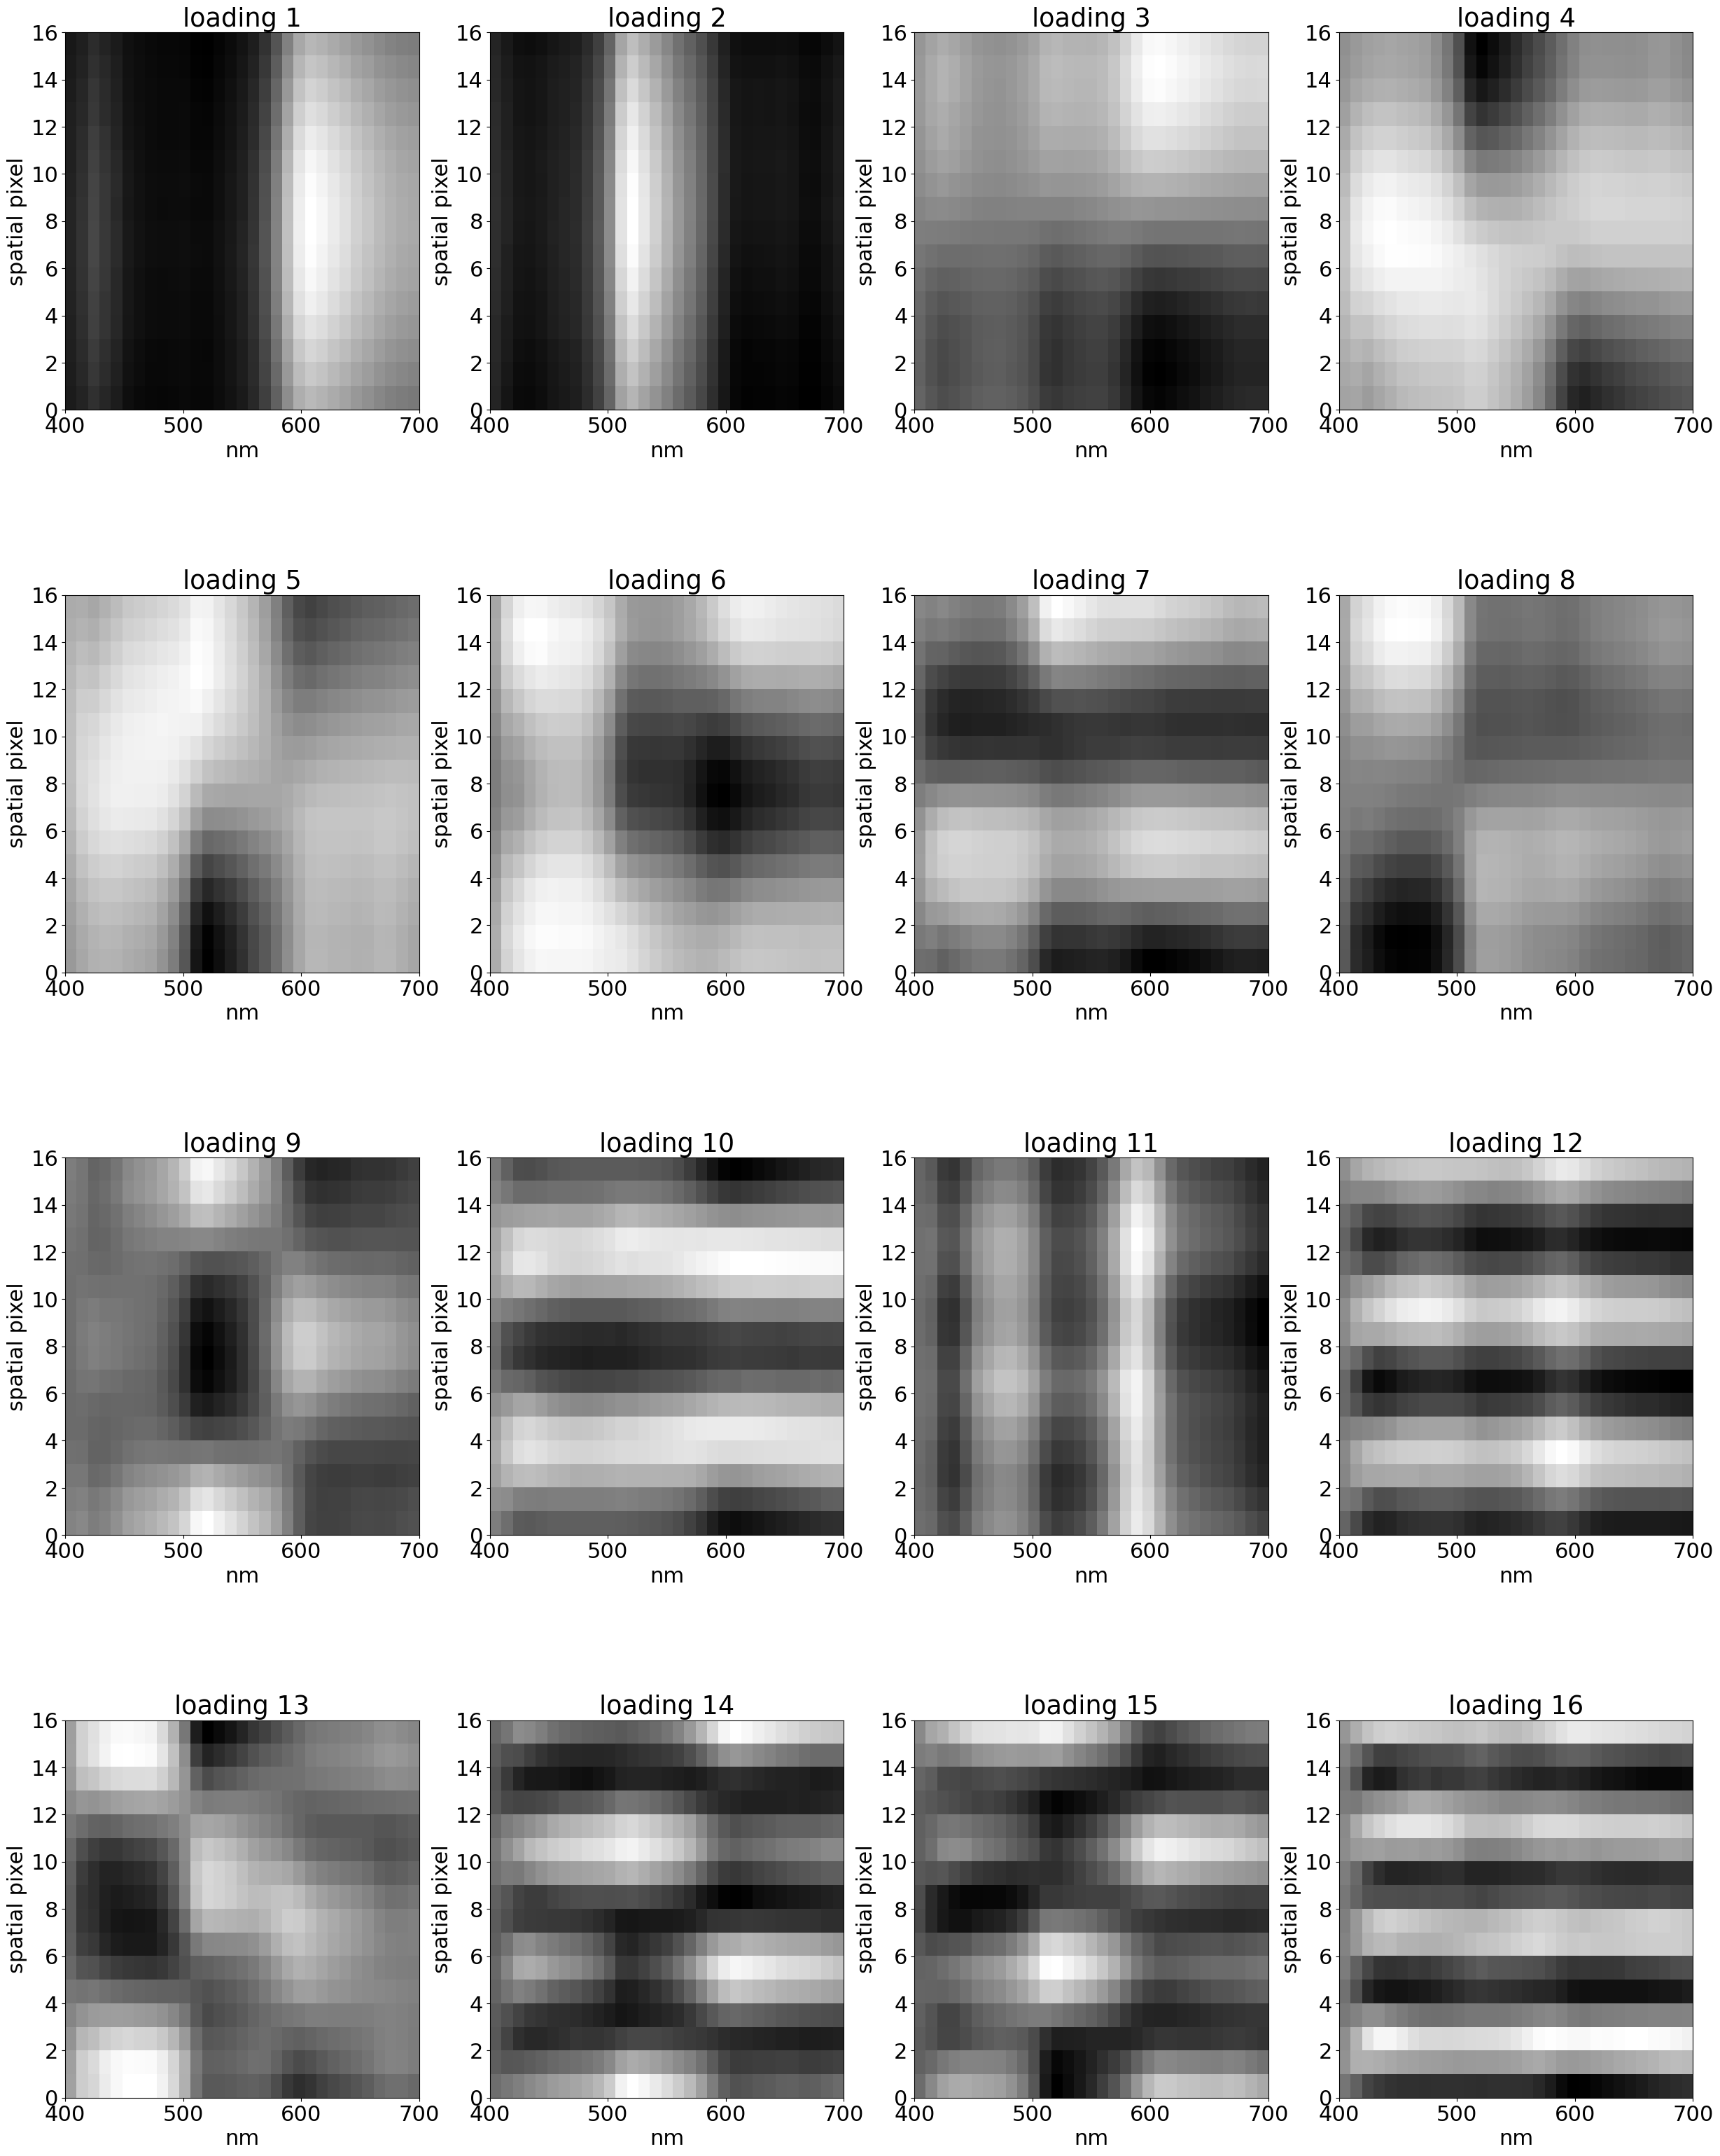

<Figure size 3000x1000 with 0 Axes>

In [81]:
plt.figure(figsize=(30,40))
for pip in range(16):
  plt.subplot(4,4,pip+1)
  plt.imshow(pca.components_[pip,:].reshape(16,31),cmap='gray',extent=[400,700,0,16],aspect=20)
  plt.ylabel('spatial pixel')
  plt.xlabel('nm')
  plt.title('loading '+str(pip+1))
plt.show()
plt.savefig('spatiospectralPCA.pdf')